In [3]:
! pip install inference

In [2]:
! pip install Roboflow

In [4]:
from inference_sdk import InferenceHTTPClient
from inference import get_model
import supervision as sv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [13]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)
# infer on a local image
result = CLIENT.infer("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/023.jpg", model_id="manga-text-detection/2")

In [14]:
img = cv.imread("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/023.jpg")
img_trials = img.copy()

In [95]:
from xml.etree import ElementTree as ET
import os

PATH = "/Users/sarancibia/Downloads/Manga109s_released_2023_12_07/annotations"

tree = ET.parse(os.path.join(PATH, 'GinNoChimera-es.xml'))
root = tree.getroot()

data = []

for i, pages in enumerate(root[1]):

    page = {}
    page['page'] = i

    bubbles = []

    for elem in pages:

        if elem.tag == 'text':

            info = elem.attrib
            info['text'] = elem.text

            bubbles.append(info)

    page['bubbles'] = bubbles

    data.append(page)

In [99]:
data

[{'page': 0, 'bubbles': []},
 {'page': 1,
  'bubbles': [{'id': '0001b31b',
    'xmin': '622',
    'ymin': '614',
    'xmax': '701',
    'ymax': '703',
    'translated_text': 'Habilidades especiales son cocinar y tareas domésticas en general.',
    'text': '特技は料理および家事全般'},
   {'id': '0001b31c',
    'xmin': '612',
    'ymin': '149',
    'xmax': '670',
    'ymax': '223',
    'translated_text': '1er año clase A Ryusei Tsugi',
    'text': '1年A組\u3000杠\u3000龍星\u3000'},
   {'id': '0001b31d',
    'xmin': '670',
    'ymin': '289',
    'xmax': '727',
    'ymax': '380',
    'translated_text': 'Altura 175 cm Peso 58 kg',
    'text': '身長175cm\u3000体重58kg'},
   {'id': '0001b31f',
    'xmin': '585',
    'ymin': '422',
    'xmax': '661',
    'ymax': '552',
    'translated_text': 'Sus calificaciones son excelentes y es bueno en los deportes.',
    'text': '成績はトップクラスでスポーツ万能'},
   {'id': '0001b320',
    'xmin': '206',
    'ymin': '476',
    'xmax': '283',
    'ymax': '590',
    'translated_text': 'Pero u

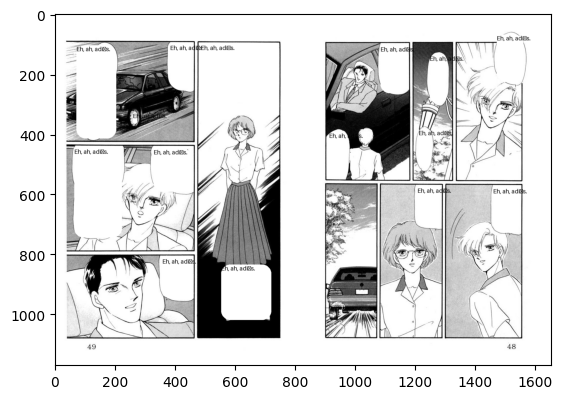

In [63]:
img_pil = Image.fromarray(img_trials)
draw = ImageDraw.Draw(img_pil)

for prediction in result['predictions']:
    if prediction['class'] == 'text_bubble':
        x = round(prediction['x'])
        y = round(prediction['y'])
        width = round(prediction['width'])
        height = round(prediction['height'])

        margin = 10
        x1 = round(x - width / 2) + margin
        y1 = round(y - height / 2) + margin
        x2 = round(x + width / 2) - margin
        y2 = round(y + height / 2) - margin

        draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=30)

        font = ImageFont.load_default()
        spacing = 50
        text = u"""Eh, ah, adiós."""

        for index, text in enumerate(data):
            draw.multiline_text([x1, y1, x2, y2], text, fill ="black", spacing = spacing, align ="left", font_size= 20)

plt.imshow(img_pil)

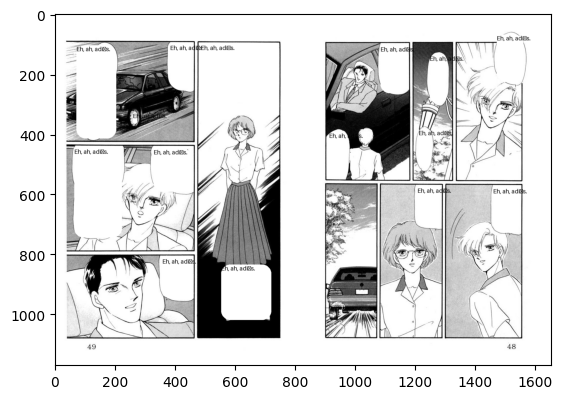

In [102]:
img_pil_2 = Image.fromarray(img_trials)
draw = ImageDraw.Draw(img_pil_2)

for page_data in data:
    for bubble in page_data['bubbles']:
        x = round(float(bubble['xmin']))
        y = round(float(bubble['ymin']))
        width = round(float(bubble['xmax']))
        height = round(float(bubble['ymax']))

        margin = 10
        x1 = round(x - width / 2) + margin
        y1 = round(y - height / 2) + margin
        x2 = round(x + width / 2) - margin
        y2 = round(y + height / 2) - margin

        draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=30)

        font = ImageFont.load_default()
        spacing = 50
        translated_text = bubble['translated_text']

        draw.multiline_text([x1, y1, x2, y2], translated_text, fill="black", spacing=spacing, align="left",
                            font_size=20)

plt.imshow(img_pil)